## Algemeen, data inladen

In [43]:
import pandas as pd
import datetime
from configparser import ConfigParser
import json, requests


pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 500)
PANDAS_FILE = '../simplicate_cache/hours.pd'
df = pd.read_pickle(PANDAS_FILE)

pd.options.display.float_format = '{:,.1f}'.format
#df['turnover'] = df.apply(lambda a: (a['hours']+a['corrections']) * (a['tariff'] if a['tariff'] > 0 else a['service_tariff']), axis=1)
#df['turnover'] = df.apply(lambda a: 0 if a['project_number'] == 'TOR-3'  and a['service'] == 'Development Sprints Q1' else a['turnover'], axis=1)
#df['week'] = df.apply(lambda a: datetime.datetime.strptime(a['day'],'%Y-%m-%d').isocalendar()[1], axis=1)
df[-20:]

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
7658,Patricia Snel,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,1.5,2021-03-15,forwarded,0.0,0.0,11
7659,Stefan Roovers,Sprout Money BV,project:8a11f2a1ccca7569feaad60b7a7437df,Value Jagers Agile,VJ2021,Value Jagers - Maart 2021,normal,110.0,Project Management,True,85.0,0.5,2021-03-15,to_forward,0.0,42.5,11
7660,Stefan Roovers,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Teambuilding,normal,0.0,Internal,False,0.0,0.5,2021-03-15,to_forward,0.0,0.0,11
7661,Paulo Nuno da Cruz Moreno,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve yourself,normal,0.0,Internal,False,0.0,4.5,2021-03-15,to_forward,0.0,0.0,11
7662,Mandy Dorée,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Teambuilding,normal,0.0,Internal,False,0.0,0.5,2021-03-15,to_forward,0.0,0.0,11
7663,Stefan Roovers,Sprout Money BV,project:d546df523896bc3afeaad60b7a7437df,Marktgevoel Strippenkaart,MG2021,Marktgevoel - Maart 2021,normal,80.0,Testing,True,85.0,1.5,2021-03-15,to_forward,0.0,127.5,11
7664,Patricia Snel,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,1.0,2021-03-15,forwarded,0.0,0.0,11
7665,Gerben van Dijk,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Teambuilding,normal,0.0,Internal,False,0.0,0.5,2021-03-15,to_forward,0.0,0.0,11
7666,Mandy Dorée,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.5,2021-03-15,to_forward,0.0,0.0,11
7667,Mandy Dorée,Accell IT,project:ba493253e99f604dfeaad60b7a7437df,Headless 2021,ACC-1,Development Sprints Maart,normal,80.0,Testing,True,85.0,2.0,2021-03-15,to_forward,0.0,170.0,11


In [44]:
df['turnover'].sum()

657725.6625000034

In [45]:
tor = df.query('project_number == "TOR-3"')     
tor.groupby(['service'])[['hours','turnover']].sum()

,hours,turnover
service,,
Development Sprints Q1,"1,436.0",0.0
TOR 3.0 Fase 2 Ameland 2021,16.0,"1,380.0"
TOR 3.0 Fase 2 Schiermonnikoog 2021,21.2,"1,900.6"
TOR 3.0 Fase 2 Texel 2021,12.0,"1,140.0"
TOR 3.0 fase 2,12.5,"1,675.0"


In [46]:
tor.query('service != "Development Sprints Q1"')

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
3642,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,77.5,4.0,2021-02-04,projectmanager_approved,0.0,310.0,5
3697,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Back-end Development,False,110.0,0.0,2021-02-05,forwarded,0.0,0.0,5
3913,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,95.0,0.0,2021-02-08,forwarded,0.0,0.0,6
4396,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Schiermonnikoog 2021,normal,95.0,Front-end Development,True,95.0,0.5,2021-02-11,projectmanager_approved,0.0,47.5,6
4568,Sho Stegmeijer,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,95.0,3.0,2021-02-12,projectmanager_approved,0.0,285.0,6
4597,Sho Stegmeijer,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,95.0,5.0,2021-02-12,projectmanager_approved,0.0,475.0,6
4705,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,95.0,0.0,2021-02-15,to_forward,0.0,0.0,7
4851,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Schiermonnikoog 2021,normal,95.0,Front-end Development,True,95.0,0.2,2021-02-16,projectmanager_approved,0.0,23.8,7
4901,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Back-end Development,True,77.5,4.0,2021-02-16,projectmanager_approved,0.0,310.0,7
5013,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,85.0,0.0,2021-02-17,forwarded,0.0,0.0,7


## Focus op gewerkte uren, laat vrij/ziek eruit

In [2]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')
worked.describe()

,service_tariff,tariff,hours,corrections,turnover,week
count,"7,553.0","7,553.0","7,553.0","7,553.0","7,553.0","7,553.0"
mean,40.8,38.0,2.1,-0.1,90.6,5.6
std,48.4,82.1,2.4,0.8,206.4,3.2
min,0.0,0.0,0.0,-8.0,-0.0,1.0
25%,0.0,0.0,0.5,0.0,0.0,3.0
50%,0.0,0.0,1.0,0.0,0.0,6.0
75%,95.0,85.0,3.0,0.0,63.8,8.0
max,140.0,"6,000.0",11.0,0.2,"6,000.0",53.0


## Overzicht per dag/week

In [3]:
worked.groupby(['week','day'])[['hours','turnover']].sum()

hours  turnover
week day                        
1    2021-01-04  305.2   3,600.0
     2021-01-05  336.2  15,237.7
     2021-01-06  294.2  15,507.0
     2021-01-07  299.2  14,001.0
     2021-01-08  241.8  13,110.3
...                ...       ...
11   2021-03-15   78.2   1,579.1
     2021-03-16    1.0       0.0
53   2021-01-01    0.0       0.0
     2021-01-02    2.0      42.5
     2021-01-03    2.5       0.0

[75 rows x 2 columns]

In [4]:
worked.groupby(['week'])[['hours','turnover']].sum()

,hours,turnover
week,,
1,"1,481.3","61,498.4"
2,"1,582.5","70,870.7"
3,"1,553.5","60,148.0"
4,"1,525.5","64,657.3"
5,"1,580.2","56,296.1"
6,"1,459.1","75,612.4"
7,"1,630.5","67,147.3"
8,"1,512.0","73,615.4"
9,"1,649.0","76,913.4"


## Per persoon

In [5]:
teamview = pd.DataFrame( worked )
team = sorted([str(t) for t in teamview.employee.unique()])
for t in team:
    teamview[t] = teamview.apply(lambda a: a['turnover'] if a['employee'] == t else 0, axis=1)
cols= ['hours','turnover'] + team
pppw = teamview.groupby(['week'])[cols].sum().query('turnover > 0').T
pppw = pppw.drop( ['hours','turnover','Freelancer','Hans-Peter Harmsen', 'Gert Braun', 'Richard de Boer', 
                   'Joost Cornelissen', 'Jasper Bok', 'Mel Schuurman', 'Martijn van Klaveren', 
                   'Angela Duijs', 'Lunah Smits','Michiel Willekens', 'Wouter Gerrits'])
pppw.loc['mean'] = pppw.mean()
cols = ['week'+str(col) for col in pppw.columns]
pppw.columns = cols
maxVal = 3000
for col in cols:
    pppw[col] = pppw[col].where(pppw[col] < maxVal, maxVal)
pppw

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week53
Bas Colenbrander,680.0,640.0,"1,340.0","2,315.0",170.0,"1,077.5",742.8,"2,551.2","1,221.2","2,165.0",0.0,0.0
Caspar Geerlings,435.0,"1,159.5","1,030.0",511.8,"1,069.5",972.2,735.0,890.8,769.2,"1,642.5",0.0,0.0
Chris Neven,"2,125.0","3,000.0",793.8,48.4,629.7,"1,085.9",721.7,813.8,833.1,784.7,0.0,0.0
Eva Korteweg,942.5,800.9,"1,331.6",587.5,411.4,505.2,718.0,749.7,"1,752.0","1,670.2",352.2,0.0
Fadhlur Zahri,"1,064.2",492.7,778.5,"1,787.5","1,536.5","1,685.8","1,180.0","2,119.0","2,271.8","2,913.5",0.0,0.0
Filipe José Mariano dos Santos,"2,720.0","2,260.0","2,305.0","2,720.0","2,550.0","2,200.0","2,897.5","3,000.0","2,885.0","3,000.0",0.0,0.0
Geert-Jan van Mastrigt,"2,115.0","2,040.0","1,848.8","1,912.5","1,275.0","2,152.5","1,912.5",886.2,"1,810.0","1,615.0",0.0,0.0
George Tsimenis,"3,000.0","3,000.0","3,000.0","2,970.0",440.0,"3,000.0","2,060.0","2,205.0","2,350.0","3,000.0",0.0,0.0
Gerben van Dijk,"2,345.0","2,681.2","2,566.2","1,573.8","1,987.5","3,000.0","1,423.8","2,412.5","1,861.2","3,000.0",238.8,0.0
Gijs Kattenberg,"3,000.0","2,750.0","2,345.0","1,757.5","1,562.5","1,776.0","1,913.4","3,000.0","2,415.8","1,573.0",0.0,0.0


In [6]:
[str(col) for col in pppw.columns]

['week1',
 'week2',
 'week3',
 'week4',
 'week5',
 'week6',
 'week7',
 'week8',
 'week9',
 'week10',
 'week11',
 'week53']

In [7]:
!pip install matplotlib

In [8]:
%matplotlib inline


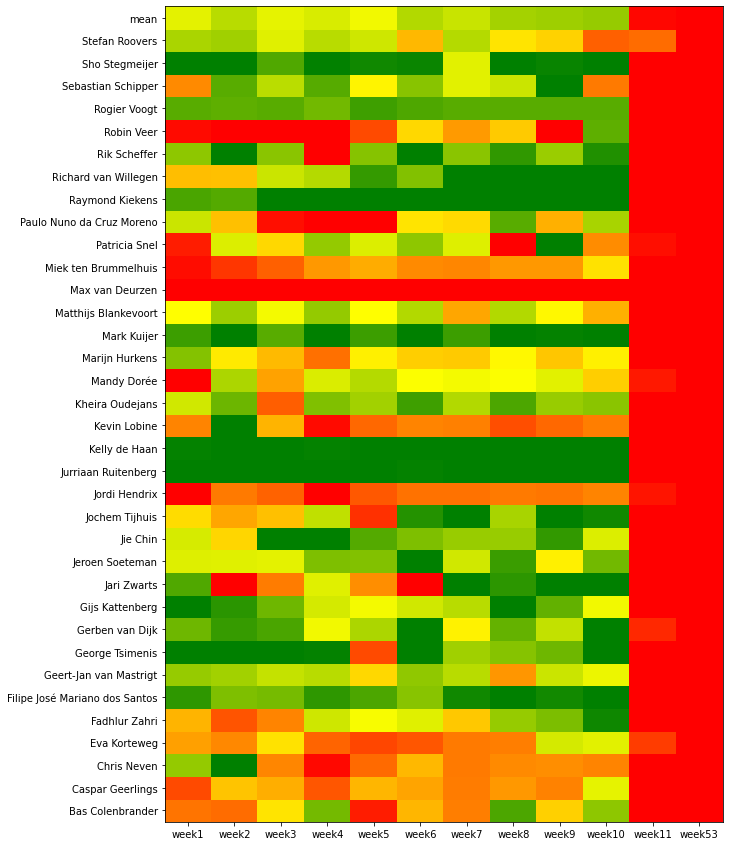

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize'] = [10, 15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.pcolor(pppw, cmap=cmap)
plt.yticks(np.arange(0.5, len(pppw.index), 1), pppw.index)
plt.xticks(np.arange(0.5, len(pppw.columns), 1), pppw.columns)
#plt.set_size(500,800)
plt.show()

## Specifics
### Werk door een medewerker in een week

In [10]:
def person_week( employee, week ):
    filtered = df.query( f'employee == "{employee}" and week=={week}' )
    print( filtered.groupby(['week','day','project_name'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
    
person_week( 'Jordi Hendrix', 2)    

                              hours  corrections  turnover
week day        project_name                              
2    2021-01-11 Internal        1.0          0.0       0.0
                TOR 3.0         7.0          0.0     166.2
     2021-01-12 Internal        0.0          0.0       0.0
                TOR 3.0         8.0          0.0     190.0
     2021-01-14 TOR 3.0         8.0          0.0     190.0
     2021-01-15 Internal        0.5          0.0       0.0
                TOR 3.0         7.5          0.0     178.1
Totals 32, €724


In [11]:
df.query( f'employee ==  "Jordi Hendrix" and week==2' )

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
741,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,1.0,2021-01-11,projectmanager_approved,0.0,0.0,2
742,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,7.0,2021-01-11,projectmanager_approved,0.0,166.2,2
908,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.0,2021-01-12,forwarded,0.0,0.0,2
909,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,8.0,2021-01-12,projectmanager_approved,0.0,190.0,2
1229,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,8.0,2021-01-14,projectmanager_approved,0.0,190.0,2
1382,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,7.5,2021-01-15,projectmanager_approved,0.0,178.1,2
1383,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.0,2021-01-15,forwarded,0.0,0.0,2
1384,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.5,2021-01-15,projectmanager_approved,0.0,0.0,2


In [12]:
person_week( 'Filipe José Mariano dos Santos', 4)

                                   hours  corrections  turnover
week day        project_name                                   
4    2021-01-25 CopyCoin M&S 2021    7.0          0.0     595.0
                Internal             1.0          0.0       0.0
     2021-01-26 CopyCoin M&S 2021    2.5          0.0     212.5
                Internal             5.5          0.0       0.0
     2021-01-27 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-28 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-29 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
Totals 40, €2720


In [13]:
person_week( 'Jordi Hendrix', 4)

                              hours  corrections  turnover
week day        project_name                              
4    2021-01-25 Internal        1.0          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-26 Internal        0.5          0.0       0.0
                TOR 3.0         7.8         -7.8       0.0
     2021-01-28 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-29 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
Totals 31, €0


### Werk aan een specifiek project in eenweek

In [14]:
def project_week( project, week ):
    filtered = df.query( f'project_number == "{project}" and week=={week}' )
    print( filtered.groupby(['week','day','employee'])[['hours','turnover']].sum())
    totals = filtered[['hours','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[1])}')    
    
project_week( 'TOR-3', 4)


                                      hours  turnover
week day        employee                             
4    2021-01-25 Chris Neven             7.5      48.4
                Eva Korteweg            3.0       0.0
                Jordi Hendrix           7.0       0.0
                Kevin Lobine            7.2      -0.0
                Mandy Dorée             2.2       0.0
                Marijn Hurkens          7.5      -0.0
                Richard de Boer         1.0      27.5
     2021-01-26 Chris Neven             8.0       0.0
                Eva Korteweg            2.5      -0.0
                Jordi Hendrix           7.8       0.0
                Kevin Lobine            8.0       0.0
                Mandy Dorée             1.5       0.0
                Marijn Hurkens          7.5      -0.0
                Richard de Boer         2.0       0.0
                Richard van Willegen    2.5      -0.0
     2021-01-27 Chris Neven             8.5      -0.0
                Kevin Lobine

## Productiviteit

In [15]:

def percentages(working):
    tot_hours = working['hours'].sum()
    print( 'tot hours', tot_hours)
    
    client_hours = working.query('organization not in ("Oberon", "Qikker Online B.V.")')['hours'].sum()
    print( 'client hours', client_hours)
    
    
    billable_hours = working.query('tariff > 0 or service_tariff>0')['hours'].sum()+working.query('tariff > 0 or service_tariff>0')['corrections'].sum()
    print( 'billiable hours', billable_hours)
    
    productivity = round( client_hours / tot_hours * 100,0)
    print( f'productief {productivity:.0f}%' )
    
    billable = round( billable_hours / tot_hours * 100,0)
    print( f'billable {billable:.0f}%' )


### Productiviteit van iedereen

In [16]:
working = df.query('type=="normal"')
percentages( working )

tot hours 15569.400000000001
client hours 9195.083333333332
billiable hours 8311.250000000033
productief 59%
billable 53%


### Productiviteit productiemensen

In [17]:
production_users = ['Gerben van Dijk', 'Sebastian Schipper', 'Filipe José Mariano dos Santos', 'Geert-Jan van Mastrigt', 'George Tsimenis', 'Marijn Hurkens', 'Kevin Lobine', 'Stefan Roovers', 'Bas Colenbrander', 'Caspar Geerlings', 'Jie Chin', 'Chris Neven', 'Fadhlur Zahri', 'Gijs Kattenberg', 'Jari Zwarts', 'Jasper Bok', 'Jeroen Soeteman', 'Jochem Tijhuis', 'Jordi Hendrix', 'Jurriaan Ruitenberg', 'Mark Kuijer', 'Matthijs Blankevoort', 'Paulo Nuno da Cruz Moreno', 'Raymond Kiekens', 'Richard van Willegen', 'Rik Scheffer', 'Robin Veer', 'Rogier Voogt', 'Sho Stegmeijer', 'Patricia Snel', 'Eva Korteweg', 'Kelly de Haan', 'Kheira Oudejans', 'Mandy Dorée', 'Miek ten Brummelhuis']
working = df.query(f'type=="normal" and employee in {production_users}')
percentages( working )

tot hours 11997.0
client hours 8777.583333333332
billiable hours 7936.000000000032
productief 73%
billable 66%


## Productivteit per persoon

In [18]:
for user in production_users:
    working = df.query(f'type=="normal" and employee == "{user}"')
    print( user )
    percentages( working )
    print()

Gerben van Dijk
tot hours 382.25
client hours 267.5
billiable hours 260.5
productief 70%
billable 68%

Sebastian Schipper
tot hours 376.0
client hours 215.25
billiable hours 215.25
productief 57%
billable 57%

Filipe José Mariano dos Santos
tot hours 392.0
client hours 336.0
billiable hours 305.5
productief 86%
billable 78%

Geert-Jan van Mastrigt
tot hours 224.25
client hours 203.0
billiable hours 203.0
productief 91%
billable 91%

George Tsimenis
tot hours 420.25
client hours 262.75
billiable hours 262.75
productief 63%
billable 63%

Marijn Hurkens
tot hours 383.0
client hours 333.25
billiable hours 303.5
productief 87%
billable 79%

Kevin Lobine
tot hours 384.0
client hours 317.75
billiable hours 285.0
productief 83%
billable 74%

Stefan Roovers
tot hours 320.75
client hours 191.0
billiable hours 191.0
productief 60%
billable 60%

Bas Colenbrander
tot hours 393.5
client hours 198.75
billiable hours 166.25
productief 51%
billable 42%

Caspar Geerlings
tot hours 384.0
client hours 97.

## Interne uren

In [19]:
working.query('tariff == 0 and service_tariff==0').groupby(['project_name','service'])['hours'].sum()

project_name  service                      
Internal      Finance                          4.5
              HRM                              3.2
              ObSessions - Improve Oberon     37.2
              ObSessions - Improve yourself    5.0
              Office                           2.5
              Operations                      35.8
              Other / Unaccountable           14.0
              Recruitment                      0.8
              Sales                            2.0
              Teambuilding                    20.0
Name: hours, dtype: float64

## Uren submitten

In [20]:
def post(url_path: str, post_fields: dict):
    headers = {
        'Authentication-Key': api_key,
        'Authentication-Secret': api_secret,
        'Content-type': 'application/json',
        'Accept': 'text/plain',
    }
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    print( 'POST', url, post_fields, headers)
    return requests.post(url, json=post_fields, headers=headers)


def get(url_path: str):
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    headers = {'Authentication-Key': api_key, 'Authentication-Secret': api_secret}
    response = requests.get(url, headers=headers, timeout=15)
    return response.json()['data']

In [21]:
print( get( '/hrm/employee?q[full_name]="Hans-Peter Harmsen"') )

NameError: name 'subdomain' is not defined

In [ ]:
employee_id = get( '/hrm/employee?q[name]=Hans-Peter Harmsen')[0]['id']
project_id = get('/projects/project?q[project_number]=OBE-1')[0]['id']
service_id = get(f'/projects/service?q[project_id]={project}&q[name]=Finance')[0]['id']
hourstype_id = get('/hours/hourstype?q[label]=Internal')[0]['id']

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d %H:%M:%S'),
  "note": "test vanuit Jupyter"
}
postdata

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d'),
  "note": "test vanuit Jupyter 2"
}
postdata

In [ ]:
#res = post( '/hours/hours', post_fields = postdata)
#res

In [ ]:
def find_bookable1( zoek):
    zoek = zoek.lower()
    projects = get('/projects/project?q[active]=True')
    projects = {p['id']:p['organization']['name']+ ' ' + p['name'] for p in projects}
    services = get(f'/projects/service?q[status]=open')

    res = []
    for s in services:
        if not s['project_id'] in projects.keys() or not s.get('name'):
            continue
        found_services = []
        for h in s.get('hour_types',[]):
            full_name = projects[s['project_id']] + ' ' + s['name'] + ' ' + h['hourstype']['label']
            full_name = full_name.replace( ' Internal ', ' ')
            if not full_name.lower().count(zoek):
                continue
            found_services += [full_name]
            print( s['id'] + ' ' + full_name)
            res += [( s['project_id'], s['id'], h['id'] )]
    if len(res) == 1:
        return res[0]
    if len(res) == 0:
        print( 'No service found')
    else:
        print( 'Multiple services found')
        for f in found_services:
            print( f )
    return None, None, None


In [ ]:
find_bookable1( 'int')

In [ ]:
services = get(f'/projects/service?q[status]=open')
ser

In [ ]:
projects = get('/projects/service?q[status]=open')
print( len( projects))

In [ ]:
projects = get('/projects/project?q[project_status.label]=active')
print( len( projects))

In [ ]:
w9 = df.query('week==9')
w9['turnover'].sum()

In [ ]:
w9['day'].max()

In [ ]:
w9_proj = w9.query('turnover>0').groupby(['project_number']).sum('turnover')
w9_proj